In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def sloppyROH (recoMap, target, refHaps, windowSize = 0.001):
    
    # figure out per snp agreement between references and reads from target
    # how many reads agree with reference alleles?
    refAgree = (1-refHaps) * target[0,:]
    # how many reads agree with alternative alleles?
    altAgree = refHaps * target[1,:]
    # the total agreement at each SNP
    totalAgree = refAgree + altAgree
    
    # make a dict that tells you which SNPs fall in a window around the focal SNP
    neighborhood = {}
    for p in range(numSnps):
        # debug print
#         if (p % 10000 == 0):
#             print (p)
        # the map relative to snp p
        relativeMap = recoMap - recoMap[p]
        # the indices of the snps that are in the window around p
        themIndices = np.nonzero(abs(relativeMap) < windowSize)
        neighborhood[p] = themIndices
    
    # need total counts per snp too normalize
    countsPerSnp = numpy.sum (target, axis=0)
    
    # now compute the number for every snp using the neighborhoods
    myROH = np.zeros(numSnps)
    for p in range(numSnps):
        # debug print
#         if (p % 10000 == 0):
#             print (p)
        # get your window
        daHood = neighborhood[p]
        # total number of reads in this window
        totalReads = np.sum(countsPerSnp[daHood])
        # get the agreement with ref haps in this window
        neighborAgreePerSnp = totalAgree[:,daHood]
        # total agreement with each ref hap in this window
        totalNeighborAgree = np.sum(neighborAgreePerSnp, axis=2)
        # relative to count number in window
        relativeNeighborAgree = totalNeighborAgree / totalReads
        # and store the max
        myROH[p] = np.max(relativeNeighborAgree)
        
    # give it away now
    return myROH

In [ ]:
def sloppyROH_Harald(recoMap, target, refHaps, windowSize = 0.001):
    
    # figure out per snp agreement between references and reads from target
    # how many reads agree with reference alleles?
    refAgree = (1-refHaps) * target[0,:]
    # how many reads agree with alternative alleles?
    altAgree = refHaps * target[1,:]
    # the total agreement at each SNP
    totalAgree = refAgree + altAgree
    
    # make a dict that tells you which SNPs fall in a window around the focal SNP
    neighborhood = {}
    for p in range(numSnps):
        # debug print
#         if (p % 10000 == 0):
#             print (p)
        # the map relative to snp p
        relativeMap = recoMap - recoMap[p]
        # the indices of the snps that are in the window around p
        themIndices = np.nonzero(abs(relativeMap) < windowSize)
        neighborhood[p] = themIndices
    
    # need total counts per snp too normalize
    countsPerSnp = numpy.sum (target, axis=0)
    
    # now compute the number for every snp using the neighborhoods
    myROH = np.zeros(numSnps)
    for p in range(numSnps):
        # debug print
#         if (p % 10000 == 0):
#             print (p)
        # get your window
        daHood = neighborhood[p]
        # total number of reads in this window
        totalReads = np.sum(countsPerSnp[daHood])
        # get the agreement with ref haps in this window
        neighborAgreePerSnp = totalAgree[:,daHood]
        # total agreement with each ref hap in this window
        totalNeighborAgree = np.sum(neighborAgreePerSnp, axis=2)
        # relative to count number in window
        relativeNeighborAgree = totalNeighborAgree / totalReads
        # and store the max
        myROH[p] = np.max(relativeNeighborAgree)
        
    # give it away now
    return myROH

In [7]:
def load_data(basefolder = ""):
    """Load and return the necessary Data from HAPSBURG output Folders.
    basefolder: Which folder to find the necessary data in"""

    posterior = np.loadtxt(basefolder + "posterior0.csv")
    # load some files maybe
    # recombination map (in morgan)
    recoMap = np.loadtxt(basefolder + "map.csv", delimiter=',')
    print (recoMap.shape)
    # readcounts for target individual
    # first line: reads for ref; second line: reads for alt
    target = np.loadtxt(basefolder + "readcounts.csv", delimiter=',')
    print (target.shape)
    numSnps = target.shape[1]
    # read in references
    refHaps = numpy.loadtxt(basefolder + "refs.csv", delimiter=',')
    print (refHaps.shape)
    
    return posterior, recoMap, target, refHaps, numSnps

In [9]:
posterior, recoMap, target, refHaps, numSnps = load_data(basefolder = "../../Simulated/1000G_Mosaic/TSI5/lambda_rc1.0/ch3_4cm/output/iid0/chr3/")

(38032,)
(2, 38032)


OSError: ../../Simulated/1000G_Mosaic/TSI5/lambda_rc1.0/ch3_4cm/output/iid0/chr3/refs.csv not found.

In [7]:
myRoh = sloppyROH (recoMap, target, refHaps)

In [9]:
# change it into counts per snp and fraction of that alt
countsPerSnp = numpy.sum (target, axis=0)
print (countsPerSnp.shape)

(38032,)


In [6]:
# first make a dict that tells you which SNPs fall in a window around the focal SNP
windowSize = 0.001
neighborhood = {}
for p in range(numSnps):
    # debug print
    if (p % 10000 == 0):
        print (p)
    # the map relative to snp p
    relativeMap = map - map[p]
    # the indices of the snps that are in the window around p
    themIndices = numpy.nonzero(abs(relativeMap) < windowSize)
    neighborhood[p] = themIndices

0
10000
20000
30000


In [7]:
# figure out the agreement between referneces and target
# how many reads agree with reference alleles?
refAgree = (1-refHaps) * target[0,:]
# how many reads agree with alternative alleles?
altAgree = refHaps * target[1,:]
# the total agreement at each SNP
totalAgree = refAgree + altAgree

In [19]:
# now compute the number for every snp using the neighborhoods
sloppyROH = numpy.zeros(numSnps)
for p in range(numSnps):
    # debug print
    if (p % 10000 == 0):
        print (p)
    # get your window
    daHood = neighborhood[p]
    # total number of reads in this window
    totalReads = numpy.sum(countsPerSnp[daHood])
    # get the agreement with ref haps in this window
    neighborAgreePerSnp = totalAgree[:,daHood]
    # total agreement with each ref hap in this window
    totalNeighborAgree = numpy.sum (neighborAgreePerSnp, axis=2)
    # relative to count number in window
    relativeNeighborAgree = totalNeighborAgree / totalReads
    # and store the max
    sloppyROH[p] = numpy.max (relativeNeighborAgree)

0
10000
20000
30000


In [8]:
hets = (target[0,:]>0) * (target[1,:]>0)

In [9]:
th = numpy.min(myRoh) + 0.9 * (numpy.max(myRoh) - numpy.min(myRoh))

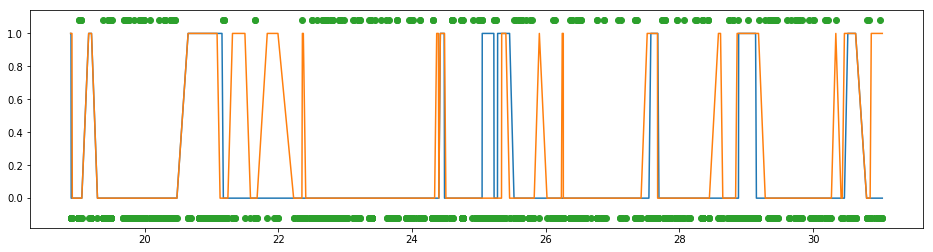

In [20]:
daRange = numpy.arange(2000,4000)
plt.figure (figsize=(16,4))
# plt.plot (recoMap[daRange]*100, 1-numpy.exp(posterior[daRange]), recoMap[daRange]*100, myRoh[daRange])
# plt.plot (recoMap[daRange]*100, 1-numpy.exp(posterior[daRange]), recoMap[daRange]*100, (hets[daRange]-0.1)*1.2, "o")
# plt.plot (recoMap[daRange]*100, 1-numpy.exp(posterior[daRange])>0.8, recoMap[daRange]*100, (myRoh > th)[daRange])
plt.plot (recoMap[daRange]*100, 1-numpy.exp(posterior[daRange])>0.8, recoMap[daRange]*100, (myRoh > th)[daRange], recoMap[daRange]*100, (hets[daRange]-0.1)*1.2, "o")
# plt.plot (recoMap[daRange]*100, 1-numpy.exp(posterior[daRange])>0.8, recoMap[daRange]*100, (myRoh > th)[daRange])


In [21]:
numpy.corrcoef (1-numpy.exp(posterior),myRoh)

array([[1.        , 0.69542516],
       [0.69542516, 1.        ]])